In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

Saving StudentsPerformance.csv to StudentsPerformance.csv
User uploaded file "StudentsPerformance.csv" with length 72036 bytes


In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
dfcopy = df

In [ ]:
dfcopy.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# ***Визуальный анализ (гистограммы)***

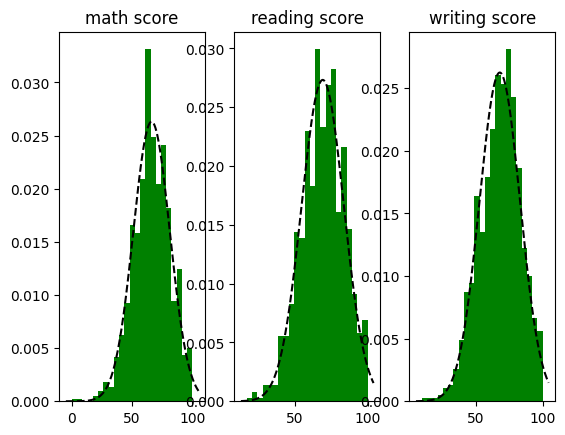

In [ ]:
keys = ['math score', 'reading score', 'writing score']

fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches = (8* len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
  ax.hist(df[key], density=True, bins=23, color='green')

  loc = df[key].mean()
  scale = df[key].std()

  x_left, x_right = ax.get_xlim()
  x = np.linspace(x_left, x_right, 10000)
  y = stats.norm.pdf(x, loc=loc, scale=scale)

  ax.plot(x, y, linestyle = 'dashed', color='black')
  ax.set_title(key)

По графикам видно, что распределения баллов по предметам грубо можно свести к нормальному. Чёрный пунктир - как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

# ***Квантили***

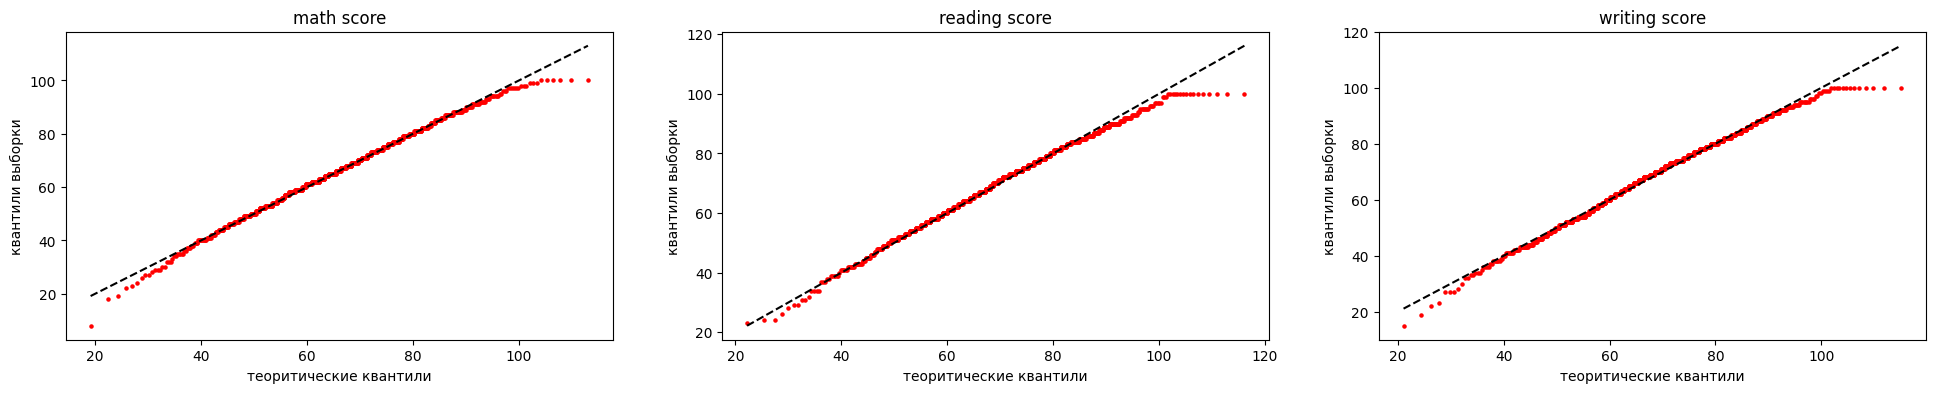

In [ ]:
fig, axes = plt.subplots(ncols = len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()


for key, ax in zip(keys, axes):
  samples = df[key]

  loc = samples.mean()
  scales = samples.std()

  interval = np.linspace(0, 1, samples.shape[0])[1:-1]
  x = stats.norm.ppf(interval, loc=loc, scale=scale)
  y = np.quantile(samples, interval)

  ax.scatter(x, y, s=5, color='red')
  ax.plot(x, x, color='black', linestyle = 'dashed')

  ax.set_title(key)
  ax.set_xlabel('теоритические квантили')
  ax.set_ylabel('квантили выборки')

Q-Q кривая. График, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением. Видно, что распределения относительно нормальны.

# ***Корелляционная сетка - тепловая карта***

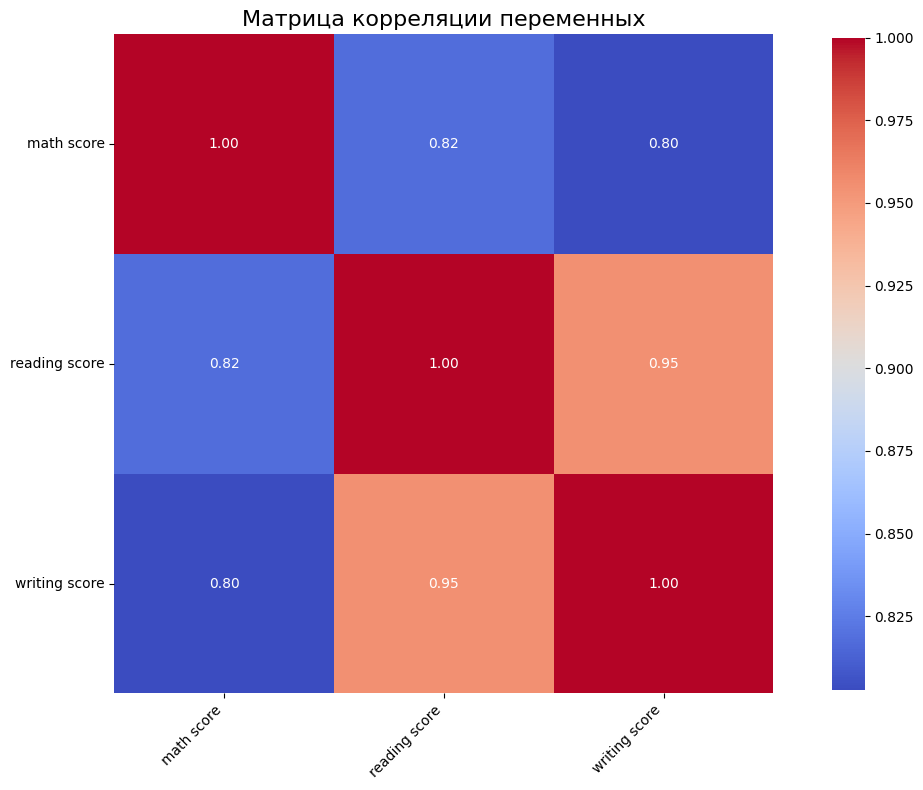

In [ ]:
numeric_columns = df.select_dtypes(include=['number']) #выбор только числовых колонок
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .99})
#annot - добавление аннотации к карте
#fmt - числовое форматирование
#cmap - цветовая настройка
#square - указание площади значений в карте
#cbar_kws - контроль размера цветовой полосы (гаммы) рядом с картой

plt.title('Матрица корреляции переменных', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Сетка для всех числовых значений

# ***Статистические показатели выборки***

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
    print()

math score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.696
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.954
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.996

reading score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.664
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.954
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.996

writing score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.688
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.958
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.996



# ***Прослеживаются ли зависимости между баллами за экзамен по математике и правописанию?***

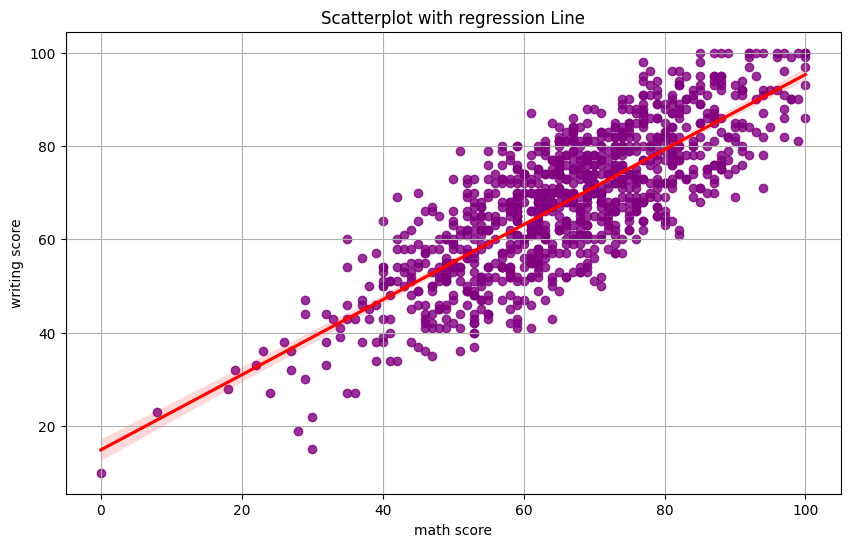

In [ ]:
data = {
    'x': dfcopy['math score'],
    'y': dfcopy['writing score']
}
df1 = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.regplot(x='x', y='y', data=df1, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Scatterplot with regression Line')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.grid(True)
plt.show()

# ***Анализ результетов по математике с помощью boxplot***

<Axes: ylabel='math score'>

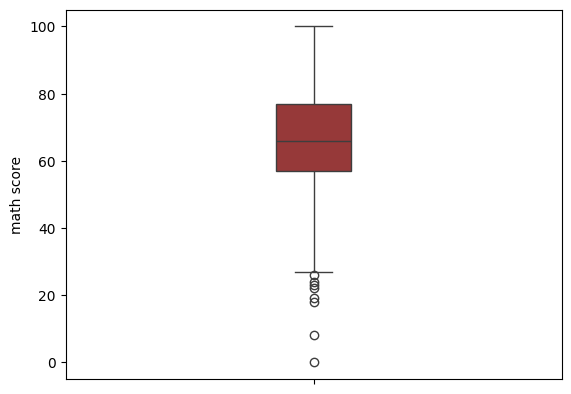

In [ ]:
sns.boxplot(dfcopy['math score'], orient='v', width=0.15, color = 'brown')

Медиана - около 70ти

In [ ]:
q1 = df['math score'].quantile(0.25)
q3 = df['math score'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(27.0, 107.0)

Границы "нормальных" значений. Всё выходящее за них - выбросы.

In [ ]:
outliers = df.loc[(df['math score'] < boxplot_range[0]) | (df['math score'] > boxplot_range[1])]

outliers.shape[0]

8

In [ ]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
print((outliers.shape[0] / df.shape[0]), '%')

0.008 %


# ***Совпадают ли параметры законов распределения баллов по математике у разных полов?***

Проведём несколько статистических тестов. Сначала проверим равенство ско выборок, а исходя из этого попробуем проверить равенство матожиданий этих же выборок. Создадим два датафрейма с баллами.

In [ ]:
dfmathmale = dfcopy.loc[dfcopy['gender']=='male', 'math score']
dfmathmale.head()

,math score
3,47
4,76
7,40
8,64
10,58


In [ ]:
dfmathfemale = dfcopy.loc[dfcopy['gender']=='female', 'math score']
dfmathfemale.head()

,math score
0,72
1,69
2,90
5,71
6,88


In [ ]:
data = {
    'sample1': dfmathmale,
    'sample2': dfmathfemale
}

dff = pd.DataFrame(data)
sample1 = dff['sample1']
sample2 = dff['sample2']

levene_p_value = stats.levene(sample1, sample2)
equal_var = False
alpha = 0.05
if levene_p_value.statistic < alpha:
    print('Отвергаем нулевую гипотезу: дисперсии выборок различны')
    equal_var = False
else:
    print('Дисперсии выборок равны')
    equal_var = True
    print('Можно перейти к проверке равенства матожиданий')

p_value = stats.ttest_ind(sample1, sample2, equal_var=equal_var)

if (equal_var==True):
  if p_value.statistic < alpha:
      print('Отвергаем нулевую гипотезу: матожидания выборок различны')
  else:
      print('Матожидания выборок равны')

Дисперсии выборок равны
Можно перейти к проверке равенства матожиданий
Матожидания выборок равны


Делаем вывод, что параметры нормальных распределений выборок совпадают.